# Alura - Imersão de Dados - Aula 1

<p>Nessa aula será utilizado o DataSet de imóveis de São Paulo, obtido do Kaggle, e iremos tentar resolver cinco problemas:</p>

<ol>
    <li>Realizar a média da metragem para cada um dos bairros; OK</li>
    <li>Duas formas de selecionar os dados por bairro (consultar o método na documentação do pandas);</li>
    <li>Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão; OK </li>
    <li>Pegar outros dados estatísticos (como média, mediana, min, max); OK</li>
    <li>Descobrir quais são os bairros que não tem nome de rua. OK</li>
</ol>

In [2]:
#Importando bibliotecas importantes
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from colorsys import hls_to_rgb #Para cores!

In [3]:
#Caminho dos dados
path = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'

In [4]:
DF_or = pd.read_csv(path) #Leio o arquivo CSV

In [5]:
DF_or

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [6]:
DF_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [7]:
DF_or.sample(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6147,NaN,Pacaembu,São Paulo,350,3,3,3,R$ 1.850.000
3871,Rua Mário Ferreira de Abreu,Vila Macedópolis,São Paulo,220,2,1,6,R$ 960.000
2615,"Rua Ytaipu, 489",Mirandópolis,São Paulo,270,4,3,3,R$ 1.790.000
5584,NaN,Granja Julieta,São Paulo,605,4,6,12,R$ 2.700.000
1526,Rua Banibás,Alto de Pinheiros,São Paulo,255,3,5,4,R$ 3.200.000


In [8]:
print(DF_or.isnull().sum())

Rua          3434
Bairro         12
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
dtype: int64


<p>Podemos ver que eistem ruas e bairros que não apresentam dados/nome na tabela (NaN). Portanto, devemos fazer um certo tratamento nessa tabela e "reescrever" esses NaN.</p>

<p>Podemos ver também que não existe nenhum problema na metragem dos dados, logo não é necessário arrumar essa coluna.</p>

In [9]:
#Obtenho as ruas e bairros NaN e os índices.
lista_nulos_DF_Rua = DF_or["Rua"].isnull()
lista_nulos_DF_Bai = DF_or["Bairro"].isnull()
lista_index = DF_or["Rua"].index
DF_copia = DF_or.copy()

In [10]:
def retornoDesc(INDEX,LISTA_NULOS,DF_RETORNO,COLUNA):
    for i in INDEX:
        if LISTA_NULOS[i]:
            DF_RETORNO[COLUNA].loc[i] = "Desconhecido"
    return DF_RETORNO
DF_copia = retornoDesc(lista_index, lista_nulos_DF_Rua, DF_copia, "Rua")
DF_copia = retornoDesc(lista_index, lista_nulos_DF_Bai, DF_copia, "Bairro")

C:\Users\User\AppData\Local\Temp\ipykernel_7400\330542171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_RETORNO[COLUNA].loc[i] = "Desconhecido"


In [11]:
DF_copia.isnull().sum()

Rua          0
Bairro       0
Cidade       0
Metragem     0
Quartos      0
Banheiros    0
Vagas        0
Valor        0
dtype: int64

<p>Como podemos ver, não temos agora mais nenhum valor NaN em nosso dataset.</p>

## 1º Desafio - Média da Metragem por bairro

In [12]:
Med_Metr_PB = pd.Series(DF_copia.groupby(["Bairro"]).mean()["Metragem"])
print("A média da metragem por bairro é:")
print(Med_Metr_PB)

A média da metragem por bairro é:
Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 702, dtype: float64


<p>Portanto, temos agora toda uma lista com os valores da média da metragem por Bairro.</p>

## 2º Desafio - Algumas informações via gráficos.

<p>Para o primeiro gráfico, vamos usar um histograma onde obtemos os 10 bairros com mais casas para alugar.</p>

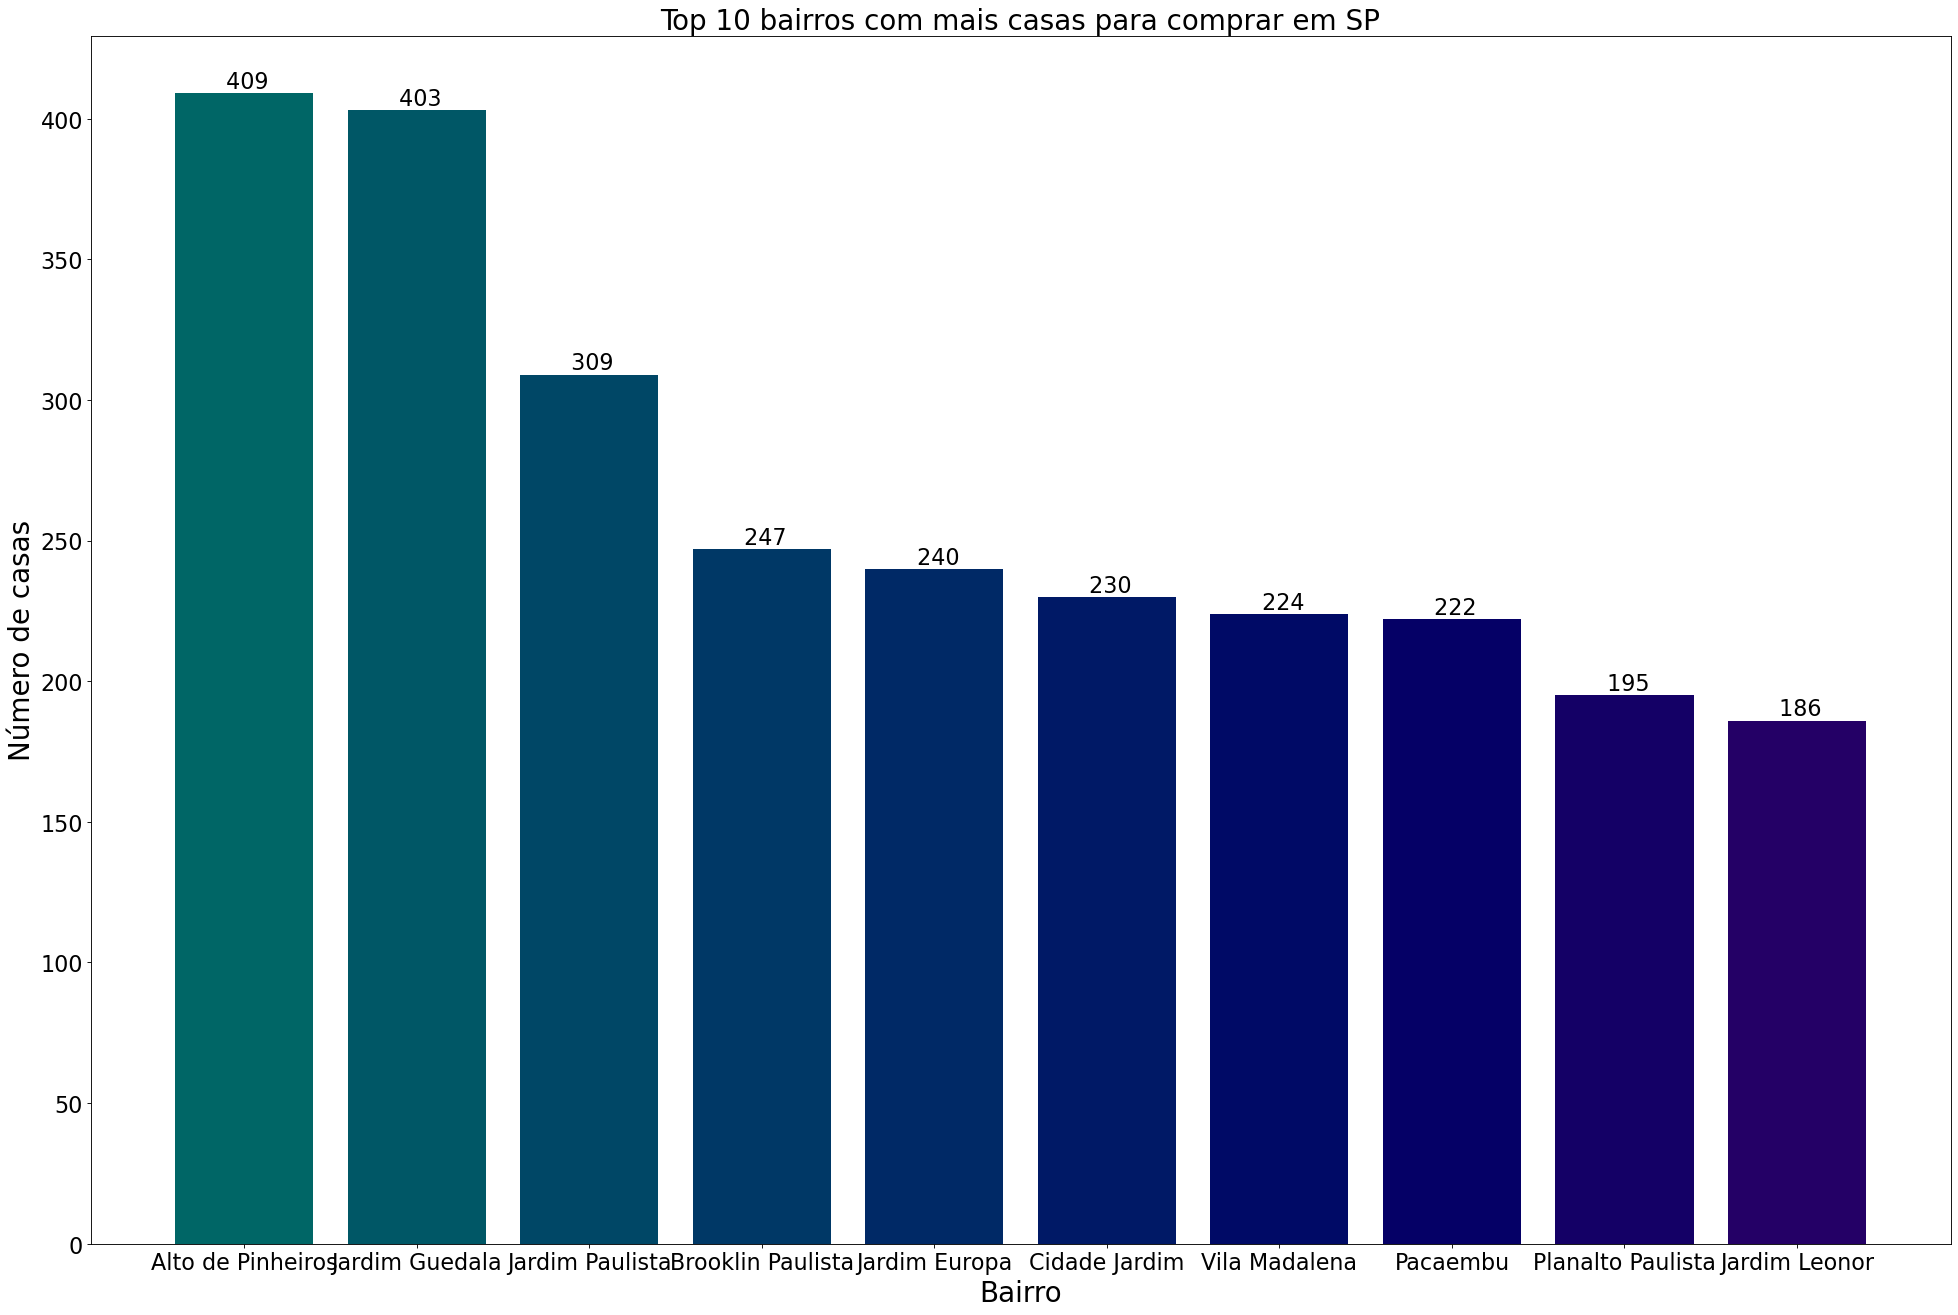

In [13]:
valores = DF_copia.groupby(["Bairro"]).count()["Metragem"]
valoresF = valores.sort_values(ascending = False).head(10)
cor = [(hls_to_rgb(i/(4*len(valoresF)),0.2,1)) for i in range(20,37)]
fonte = {'size':25}

plt.figure(figsize=(30,20),dpi=80)
plt.bar(valoresF.index, valoresF, color=cor)
for rect in plt.bar(valoresF.index,valoresF,color=cor):
    alt = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0 ,alt,f'{alt: .0f}',ha="center",va="bottom", fontsize=20)
plt.xlabel("Bairro",fontdict=fonte)
plt.xticks(fontsize=20)
plt.ylabel("Número de casas",fontdict=fonte)
plt.yticks(fontsize=20)
plt.title("Top 10 bairros com mais casas para comprar em SP",fontdict=fonte)
plt.show()

In [14]:
DF_copia.groupby(["Bairro"]).sum().sort_values(by="Vagas", ascending=False).head(10)

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Jardim Guedala,1002116,1649,2310,2441
Alto de Pinheiros,177279,1611,1979,2047
Cidade Jardim,160387,952,1192,1420
Jardim Paulista,150266,1194,1428,1384
Jardim América,113584,676,840,1241
Pacaembu,113843,866,1000,1223
Jardim Europa,134776,912,1145,1210
Morumbi,106595,693,875,1055
Jardim Leonor,109666,760,1037,1003


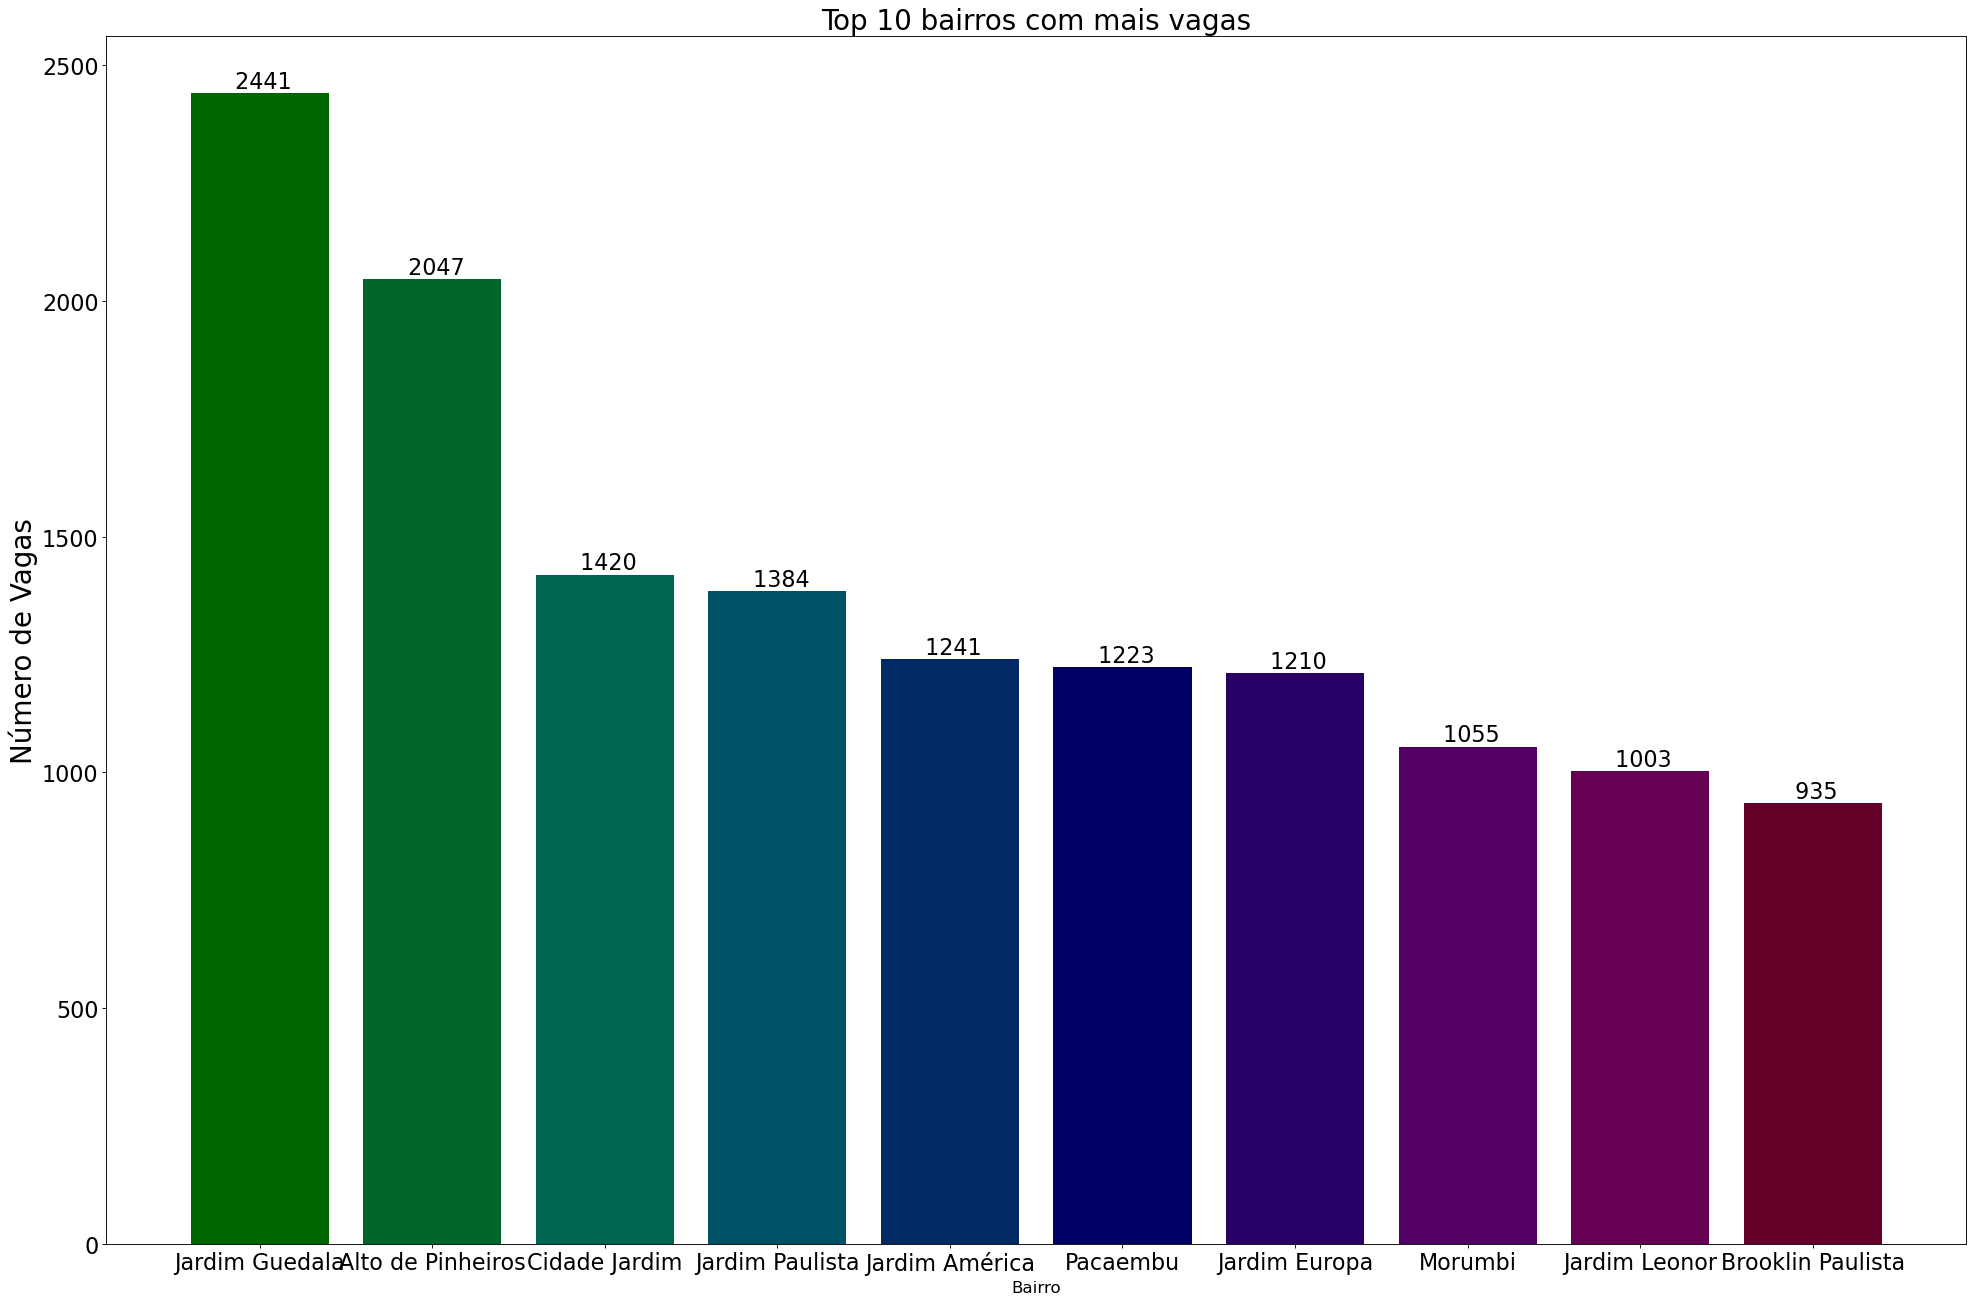

In [22]:
#Dados separados por bairro.
DF_copia_Bairro_tot = DF_copia.groupby(["Bairro"]).sum().sort_values(by="Vagas", ascending=False)

#Informações do gráfico
cor = [(hls_to_rgb(i/(3*len(DF_copia_Bairro_tot.head())),0.2,1)) for i in range(20,37)]
fonte = {'size':25}
plt.figure(figsize=(30,20),dpi=80)
plt.bar(DF_copia_Bairro_tot.head(10).index, DF_copia_Bairro_tot.head(10)["Vagas"], color=cor)
for rect in plt.bar(DF_copia_Bairro_tot.head(10).index, DF_copia_Bairro_tot.head(10)["Vagas"], color=cor):
    alt = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0 ,alt,f'{alt: .0f}',ha="center",va="bottom", fontsize=20)
plt.xlabel("Bairro",fontdict=fonte)
plt.ylabel("Número de Vagas",fontdict=fonte)
plt.title("Top 10 bairros com mais vagas",fontdict=fonte)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## 3º Desafio - Descobrir quais bairros não tem nomes de rua

<p>Supondo que eles existam.</p>

In [ ]:
#Usamos aqui o dataframe original pois queremos saber qual os bairros DENTRO do dataset que 
#apresentam alguma rua sem nome/Desconhecida. 
lista_Bairros_rua_semNome = list(DF_or[DF_or["Rua"].isnull()]["Bairro"])

In [ ]:
lista_Bairros_rua_semNome